# Оптимизация производственных расходов металлургического комбината

Для целей оптимизации производственных расходов, металлургический комбинат планирует уменьшить потребление электроэнергии на этапе обработки стали. В связи с этим, необходимо построить модель, которая предскажет финальную температуру стали.

**Этапы:**

1. Анализ данных
2. Предобработка данных, построение и обучение модели
3. Составление отчета и описание основных параметров и результатов исследования

**Заказчик.** Металлургический комбинат ООО «Так закаляем сталь»

**Цель Заказчика.** Обеспечить сокращение потребления электроэнергии за счет оптимизации процесса нагрева стали.

**Цель исследования.** Построить модель для предсказания финальной температуры стали.

**Задачи:**

- Загрузить и проанализировать имеющиеся данные
- Подготовить данные и построить модель
- Исследовать качество разных моделей, меняя гиперпараметры
- Проверить качество модели на тестовой выборке и проверить модели на вменяемость
- Сформировать отчет

**Входные данные от Заказчика.** Семь файлов в формате `.csv` с сырыми данными различных параметров работы литейного цеха металлургического комбината.

**Ожидаемый результат.** Построена модель машинного обучения для прогнозирования температуры выплавляемой стали с размером показателя `MAE` не более **6,8**.

### План:

**1.	Анализ данных**

    1.1. Загрузить библиотеки
    1.2. Открыть таблицы
    1.3. Изучить структуру данных по десяти первым строкам
    1.4. Изучить структуру данных методом info()
    1.5. Проанализировать распределение данных
    1.6. Выявить наличие аномалий и выбросов
    1.7. Визуализировать имеющиеся данные
    1.8. Сделать выводы
    1.9. Привести данные к стандартам
        •	Изменить названия столбцов
        •	Преобразовать имеющиеся типы данных

**2.	Предобработка данных, построение и обучение модели**

    2.1. Подготовить данные для дальнейшего использования
        •	Удалить / обработать выбросы и аномалии
        •	Заменит пропуски
        •	Сформировать новые параметры и провести группировку таблиц
        •	Объединить таблицы
        •	Удалить замеры с неполным числом параметров
    2.2. Разделить дата-сет таблицу параметров и таблицу целевого значения
    2.3. Разбить данные на обучающую и тестовую выборки
    2.4. Нормализовать (стандартизировать) данные
    2.5. Провести корреляционный анализ
    2.6. Построить несколько моделей и выбрать основную по критерию лучшей метрики MAE
    2.7. Методом кросс-валидации подобрать лучшие гиперпараметры для основной модели
    2.8. Проверить модель на вменяемость
    2.9. Проверить качество модели на тестовой выборке

**3.	Составление отчета и описание основных параметров и результатов исследования**

    3.1. Описать ход и этапы исследования
    3.2. Указать основные параметры модели и полученные результаты
    3.3. Определить степень готовности модели для передачи ее заказчику
    3.4. Сделать общие выводы по проекту


## 1. Анализ данных

1. Загрузить библиотеки
2. Открыть таблицы 
3. Изучить структуру данных по десяти первым строкам
4. Изучить структуру данных методом `info()`
5. Проанализировать распределение данных
6. Выявить наличие аномалий и выбросов
7. Визуализировать имеющиеся данные
8. Сделать выводы
9. Привести данные к стандартам
    - Изменить названия столбцов
    - Преобразовать имеющиеся типы данных

**Описание данных**

- `data_arc.csv` — данные об электродах (Ключ (key), Начало нагрева дугой, Конец нагрева дугой, Активная мощность, Реактивная мощность);
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём) (Ключ (key), пятнадцать значений показателя Bulk);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время) (Ключ (key), пятнадцать значений времени применения показателя Bulk);
- `data_gas.csv` — данные о продувке сплава газом (Ключ (key), объем поданного газа);
- `data_temp.csv` — результаты измерения температуры (Ключ (key), Время замера, Температура);
- `data_wire.csv` — данные о проволочных материалах (объём) (Ключ (key), девять значений показателя Wire);
- `data_wire_time.csv` — данные о проволочных материалах (время) (Ключ (key), девять значений времени применения показателя Wire).

In [116]:
# Импотрт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from numpy.random import RandomState

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error


In [117]:
# Введем константу
state = RandomState(190922)

In [118]:
# Функция исследования датасета
def info_df(df_name):
    st = df_name.shape[0]
    col = df_name.shape[1]
    zerro = df_name.isna().sum()
    keys = len(df_name['key'].unique())
    print(f'Размер таблиы: {col} столбцов и {st} строк')
    print(f'Общее количество пропусков - {zerro.sum()}')
    print()
    print(df_name.isna().sum())
    print()
    print(f'Количество явных дубликатов: {df_name.duplicated().sum()}')
    print(f'Количество уникальных ключей: {keys}')
    print()
    print(df_name.info())
    print()
    display(df_name.describe().round(2))

In [119]:
# Функция построения типовых гимтограмм
def hist_pattern(df, title):
    df.hist(bins=50, figsize=(7,5))
    plt.title(title)
    return plt.show()

def hist_pattern_any(df, title):
    df.hist(bins=50, figsize=(10,9))
    plt.title(title)
    return plt.show()

In [120]:
# Прочитаем файлы
try:
    df_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
    df_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    df_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    df_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    df_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
    df_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    df_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')
except FileNotFoundError:
    df_arc = pd.read_csv('C:\\Users\\Aser\\Первый ноутбук\\Projects\\data\\Project_5\\final_steel\\data_arc.csv')
    df_bulk = pd.read_csv('C:\\Users\\Aser\\Первый ноутбук\\Projects\\data\\Project_5\\final_steel\\data_bulk.csv')
    df_bulk_time = pd.read_csv('C:\\Users\\Aser\\Первый ноутбук\\Projects\\data\\Project_5\\final_steel\\data_bulk_time.csv')
    df_gas = pd.read_csv('C:\\Users\\Aser\\Первый ноутбук\\Projects\\data\\Project_5\\final_steel\\data_gas.csv')
    df_temp = pd.read_csv('C:\\Users\\Aser\\Первый ноутбук\\Projects\\data\\Project_5\\final_steel\\data_temp.csv')
    df_wire = pd.read_csv('C:\\Users\\Aser\\Первый ноутбук\\Projects\\data\\Project_5\\final_steel\\data_wire.csv')
    df_wire_time = pd.read_csv('C:\\Users\\Aser\\Первый ноутбук\\Projects\\data\\Project_5\\final_steel\\data_wire_time.csv')


In [121]:
df_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [122]:
info_df(df_arc)

Размер таблиы: 5 столбцов и 14876 строк
Общее количество пропусков - 0

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

Количество явных дубликатов: 0
Количество уникальных ключей: 3214

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 464.9+ KB
None



,key,Активная мощность,Реактивная мощность
count,14876.00,14876.00,14876.00
mean,1615.22,0.67,0.45
std,934.57,0.41,5.88
min,1.00,0.03,-715.50
25%,806.00,0.40,0.29
50%,1617.00,0.56,0.42
75%,2429.00,0.86,0.64
max,3241.00,3.73,2.68


Выведем аномально низкие значенимя (менее нуля)

In [123]:
df_arc.loc[df_arc['Реактивная мощность']<=0]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


In [124]:
df_arc.loc[df_arc['key']==2116]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9778,2116,2019-07-24 00:29:52,2019-07-24 00:31:54,0.433266,0.306141
9779,2116,2019-07-24 00:35:50,2019-07-24 00:38:05,0.620265,0.408352
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924
9781,2116,2019-07-24 00:51:51,2019-07-24 00:52:58,0.299368,0.198796


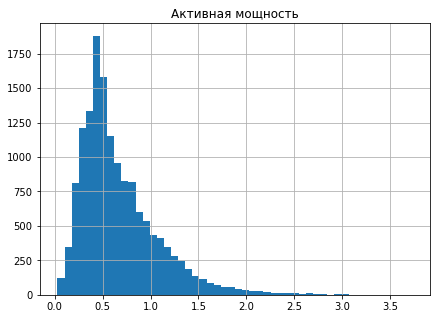

In [125]:
hist_pattern(df_arc['Активная мощность'], 'Активная мощность')

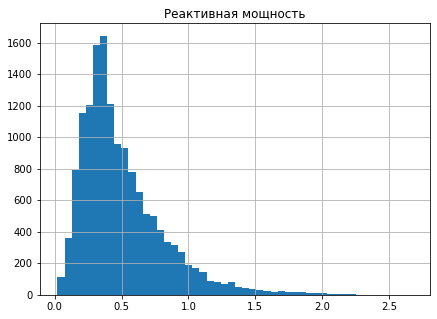

In [126]:
hist_pattern(df_arc[df_arc['Реактивная мощность']>0]['Реактивная мощность'], 'Реактивная мощность')

In [127]:
df_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [128]:
info_df(df_bulk)

Размер таблиы: 16 столбцов и 3129 строк
Общее количество пропусков - 35776

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

Количество явных дубликатов: 0
Количество уникальных ключей: 3129

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-nu

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.00,252.00,22.00,1298.00,1014.00,77.00,576.00,25.00,1.0,19.00,176.00,177.00,2450.00,18.00,2806.00,2248.00
mean,1624.38,39.24,253.05,113.88,104.39,107.03,118.93,305.60,49.0,76.32,83.28,76.82,260.47,181.11,170.28,160.51
std,933.34,18.28,21.18,75.48,48.18,81.79,72.06,191.02,NaN,21.72,26.06,59.66,120.65,46.09,65.87,51.77
min,1.00,10.00,228.00,6.00,12.00,11.00,17.00,47.00,49.0,63.00,24.00,8.00,53.00,151.00,16.00,1.00
25%,816.00,27.00,242.00,58.00,72.00,70.00,69.75,155.00,49.0,66.00,64.00,25.00,204.00,153.25,119.00,105.00
50%,1622.00,31.00,251.50,97.50,102.00,86.00,100.00,298.00,49.0,68.00,86.50,64.00,208.00,155.50,151.00,160.00
75%,2431.00,46.00,257.75,152.00,133.00,132.00,157.00,406.00,49.0,70.50,102.00,106.00,316.00,203.50,205.75,205.00
max,3241.00,185.00,325.00,454.00,281.00,603.00,503.00,772.00,49.0,147.00,159.00,313.00,1849.00,305.00,636.00,405.00


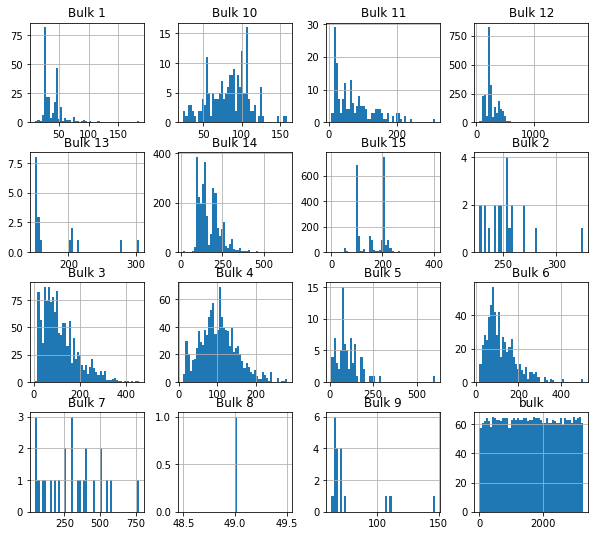

In [129]:
hist_pattern_any(df_bulk, 'bulk')

In [130]:
df_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


In [131]:
info_df(df_bulk_time)

Размер таблиы: 16 столбцов и 3129 строк
Общее количество пропусков - 35776

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

Количество явных дубликатов: 0
Количество уникальных ключей: 3129

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object

,key
count,3129.00
mean,1624.38
std,933.34
min,1.00
25%,816.00
50%,1622.00
75%,2431.00
max,3241.00


In [132]:
df_gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [133]:
info_df(df_gas)

Размер таблиы: 2 столбцов и 3239 строк
Общее количество пропусков - 0

key      0
Газ 1    0
dtype: int64

Количество явных дубликатов: 0
Количество уникальных ключей: 3239

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None



,key,Газ 1
count,3239.00,3239.00
mean,1621.86,11.00
std,935.39,6.22
min,1.00,0.01
25%,812.50,7.04
50%,1622.00,9.84
75%,2431.50,13.77
max,3241.00,78.00


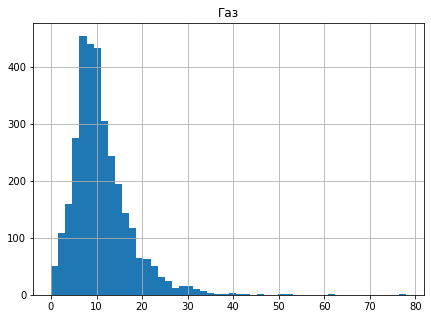

In [134]:
hist_pattern(df_gas['Газ 1'], 'Газ')

In [135]:
df_temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


In [136]:
info_df(df_temp)

Размер таблиы: 3 столбцов и 15907 строк
Общее количество пропусков - 2901

key                0
Время замера       0
Температура     2901
dtype: int64

Количество явных дубликатов: 0
Количество уникальных ключей: 3216

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 310.7+ KB
None



,key,Температура
count,15907.00,13006.00
mean,1607.88,1591.84
std,942.21,21.38
min,1.00,1191.00
25%,790.00,1581.00
50%,1618.00,1591.00
75%,2427.00,1601.00
max,3241.00,1705.00


Выведем аномально низкие значения (менее 1500 гра.)

In [137]:
df_temp[df_temp['Температура']<=1500]

,key,Время замера,Температура
4350,867,2019-06-04 14:21:00,1191.0
5978,1214,2019-06-16 05:32:00,1208.0
7958,1619,2019-06-30 11:03:54,1218.0
8913,1818,2019-07-07 00:30:49,1383.0
8914,1818,2019-07-07 00:31:40,1383.0
10127,2052,2019-07-21 14:51:40,1227.0
12564,2561,2019-08-08 07:34:15,1204.0


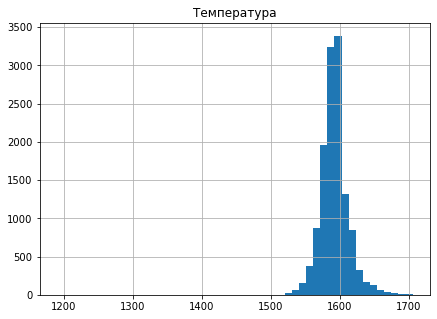

In [138]:
hist_pattern(df_temp['Температура'], 'Температура')

In [139]:
df_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
info_df(df_wire)

Размер таблиы: 10 столбцов и 3081 строк
Общее количество пропусков - 23385

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

Количество явных дубликатов: 0
Количество уникальных ключей: 3081

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None



,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.00,3055.00,1079.00,63.00,14.00,1.00,73.00,11.00,19.00,29.00
mean,1623.43,100.90,50.58,189.48,57.44,15.13,48.02,10.04,53.63,34.16
std,933.00,42.01,39.32,99.51,28.82,NaN,33.92,8.61,16.88,19.93
min,1.00,1.92,0.03,0.14,24.15,15.13,0.03,0.23,45.08,4.62
25%,823.00,72.12,20.19,95.14,40.81,15.13,25.05,6.76,46.09,22.06
50%,1619.00,100.16,40.14,235.19,45.23,15.13,42.08,9.02,46.28,30.07
75%,2434.00,126.06,70.23,276.25,76.12,15.13,64.21,11.89,48.09,43.86
max,3241.00,330.31,282.78,385.01,113.23,15.13,180.45,32.85,102.76,90.05


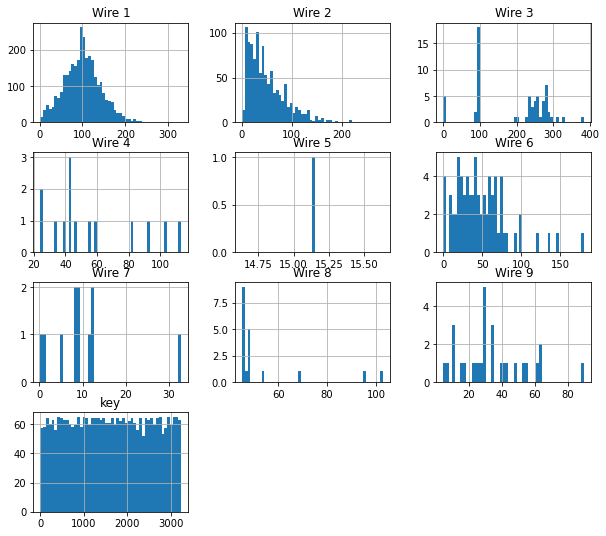

In [141]:
hist_pattern_any(df_wire, 'Wire')

In [142]:
df_wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
info_df(df_wire_time)

Размер таблиы: 10 столбцов и 3081 строк
Общее количество пропусков - 23385

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

Количество явных дубликатов: 0
Количество уникальных ключей: 3081

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 132.4+ KB
None



,key
count,3081.00
mean,1623.43
std,933.00
min,1.00
25%,823.00
50%,1619.00
75%,2434.00
max,3241.00


### Выводы по анализу данных

В разных файлах применено не синхронизированное время. Тем не менее, в рамках одного дата-фрейма, время приведено корректно. 

Общее количество ключей – `3241`. Тем не менее, нет ни одного файла, где бы присутствовали все эти `3241` ключи. Минимальная нехватка ключей в файле `data_gas` (2 ключа), максимальная нехватка – в файлах `data_wire_time` и `data_wire` (180 ключей). Данная проблема будет решена при объединении по внутреннему соединению (метод `inner`)

В парах `df_bulk` и `df_bulk_time`, `df_wire` и `df_wire_time` количество пропусков одинаковое, что говорит о соответствии таблиц действия и времени этого действия.

**Типы данных**

В файлах `data_arc`, `data_bulk_time`, `data_temp`, `data_wire_time` столбцы, содержащие даты имеют тип`object`. Привести к типу `data`

**Названия столбцов**

Во всех файлах названия столбцов не соответствуют «змеиному регистру». Названия будут изменены.

**Аномалии:**

Семь показателей температуры менее `1400` градусов Цельсия. Если данные показатели буду т первыми или последними, то ключи с ними будут удалены 
Один показатель реактивной мощности с отрицательным значением. Вероятно, ошибка ввода – вместо `0` введено `-715`. Заменить на `0.504924`.

### Вопросы

1. В чем разница между активной и реактивной мощностью? 
2. Почему замер температуры происходит не сразу после первого / второго нагрева плавки? 
3. Почему нет замера температуры перед подачей проволоки? 
4. Какая температура является целевым показателем: последняя, средняя или максимальная?
5. Какакя целевая метрика?

### Обработка таблиц

In [144]:
# Изменение типов данных
df_arc['Начало нагрева дугой'] = pd.to_datetime(df_arc['Начало нагрева дугой'], 
                                               format='%Y-%m-%d %H:%M:%S')
df_arc['Конец нагрева дугой'] = pd.to_datetime(df_arc['Конец нагрева дугой'], 
                                              format='%Y-%m-%d %H:%M:%S')

df_temp['Время замера'] = pd.to_datetime(df_temp['Время замера'], 
                                        format='%Y-%m-%d %H:%M:%S')

bulk_time_col = list(df_bulk_time.columns[1:])
for i in bulk_time_col:
    df_bulk_time[str(i)] = pd.to_datetime(df_bulk_time[str(i)],
                                          format='%Y-%m-%d %H:%M:%S')

wire_time_col = list(df_wire_time.columns[1:])
for i in wire_time_col:
    df_wire_time[str(i)] = pd.to_datetime(df_wire_time[str(i)],
                                          format='%Y-%m-%d %H:%M:%S')


In [145]:
# Изменение названий столбцов

df_arc.columns = ['key', 'start_heating', 'end_heating', 'active_power', 'reactive_power']

bulk_columns = ['key']
for i in range(15):
    bulk_columns.append('bulk_' + str(i+1))

df_bulk.columns = bulk_columns
df_bulk_time.columns = bulk_columns

df_gas.columns = ['key', 'gas']
df_temp.columns = ['key', 'measur_time', 'temperature']

wire_columns = ['key']
for i in range(9):
    wire_columns.append('wire_' + str(i+1))

df_wire.columns = wire_columns
df_wire_time.columns = wire_columns


In [146]:
list_df = [df_arc, df_bulk, df_bulk_time, df_gas, df_temp, df_wire, df_wire_time]
for i in list_df:
    display(i.head())

,key,start_heating,end_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaT,NaT,NaT,2019-05-03 11:21:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:03:52,NaT,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaT,NaT,NaT,2019-05-03 11:46:38,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:40:20,NaT,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaT,NaT,NaT,2019-05-03 12:31:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:09:40,NaT,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaT,NaT,NaT,2019-05-03 12:48:43,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:41:24,NaT,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaT,NaT,NaT,2019-05-03 13:18:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:12:56,NaT,2019-05-03 13:12:56,2019-05-03 13:12:56


,key,gas
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


,key,measur_time,temperature
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,2019-05-03 11:11:41,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:46:10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:13:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:48:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT


## 2. Предобработка данных, построение и обучение модели

1. Подготовить данные для дальнейшего использования
    - Удалить / обработать выбросы и аномалии
    - Заменит пропуски
    - Сформировать новые параметры и провести группировку таблиц
    - Объединить таблицы
    - Удалить замеры с неполным числом параметров
2. Разделить дата-сет таблицу параметров и таблицу целевого значения
3. Разбить данные на обучающую и тестовую выборки
4. Нормализовать (стандартизировать) данные
5. Провести корреляционный анализ
6. Построить несколько моделей и выбрать основную по критерию лучшей метрики MAE
7. Методом кросс-валидации подобрать лучшие гиперпараметры для основной модели
8. Проверить модель на вменяемость
9. Проверить качество модели на тестовой выборке

**Подготовка данных файла df_temp**

- Удалим пропуски (заменим на 0)
- Удалим ключи с некорректными и отсутствующими данными
- Сведем данные в пригодную для анализа форму

In [147]:
df_temp.isna().sum()

key               0
measur_time       0
temperature    2901
dtype: int64

In [148]:
df_temp['temperature'] = df_temp['temperature'].fillna(0)

In [149]:
df_temp.isna().sum()

key            0
measur_time    0
temperature    0
dtype: int64

In [150]:
# Два ключа с одним замером. Их надо убрать
df_count = df_temp.groupby('key')['measur_time'].count().sort_values()
df_count

key
279      1
195      1
2497     2
151      2
1415     2
        ..
2108    15
1214    16
44      16
46      16
1513    16
Name: measur_time, Length: 3216, dtype: int64

In [151]:
# Сведем данные по температурам
agg_func_selection = {'temperature': ['first', 'last']}
df_temp_fin = df_temp.sort_values(by=['measur_time']).groupby(['key']).agg(agg_func_selection)
df_temp_fin.columns = ['start_temp', 'end_temp']
df_temp_fin['key'] = df_temp_fin.index
df_temp_fin.index.name = None
df_temp_fin.head()

,start_temp,end_temp,key
1,1571.0,1613.0,1
2,1581.0,1602.0,2
3,1596.0,1599.0,3
4,1601.0,1625.0,4
5,1576.0,1602.0,5


In [152]:
# Удалим ключи с одним замером
df_temp_fin = df_temp_fin.drop(index=[279, 195])

In [153]:
# Ключи с отсутствующим последним замером температуры
df_temp_fin[df_temp_fin['end_temp']==0].count()

start_temp    739
end_temp      739
key           739
dtype: int64

In [154]:
# Некорректно низкое значение температуры
df_temp_fin[df_temp_fin['start_temp']<=1500]

,start_temp,end_temp,key
867,1191.0,1599.0,867
1214,1208.0,1591.0,1214
1619,1218.0,1590.0,1619
2052,1227.0,1592.0,2052
2561,1204.0,0.0,2561


In [155]:
# Удаление ключей с некорректными значениями
df_temp_fin = df_temp_fin.loc[df_temp_fin['end_temp']>0]
df_temp_fin = df_temp_fin.loc[df_temp_fin['start_temp']>1500]

In [156]:
# df_temp подготовлен
df_temp_fin.head()

,start_temp,end_temp,key
1,1571.0,1613.0,1
2,1581.0,1602.0,2
3,1596.0,1599.0,3
4,1601.0,1625.0,4
5,1576.0,1602.0,5


**Подготовка данных файлов df_bulk и df_wire**

- Удалим пропуски (заменим на 0)
- Удалим ключи с отсутствующими данными

In [157]:
df_bulk.isna().sum()

key           0
bulk_1     2877
bulk_2     3107
bulk_3     1831
bulk_4     2115
bulk_5     3052
bulk_6     2553
bulk_7     3104
bulk_8     3128
bulk_9     3110
bulk_10    2953
bulk_11    2952
bulk_12     679
bulk_13    3111
bulk_14     323
bulk_15     881
dtype: int64

In [158]:
df_bulk = df_bulk.fillna(0)

In [159]:
df_bulk.isna().sum()

key        0
bulk_1     0
bulk_2     0
bulk_3     0
bulk_4     0
bulk_5     0
bulk_6     0
bulk_7     0
bulk_8     0
bulk_9     0
bulk_10    0
bulk_11    0
bulk_12    0
bulk_13    0
bulk_14    0
bulk_15    0
dtype: int64

In [160]:
# Выявим ключи с отсутствующими данными

df_bulk['sum_value'] = df_bulk.iloc[:, 1:].sum(axis=1)
df_bulk[df_bulk['sum_value']==0]

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,sum_value


In [161]:
#Ключей с отсутствующими данными нет. Удалим временных столбец sum_value
df_bulk.drop('sum_value', axis=1, inplace=True)

# df_bulk подготовлен
df_bulk.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


In [162]:
df_wire.isna().sum()

key          0
wire_1      26
wire_2    2002
wire_3    3018
wire_4    3067
wire_5    3080
wire_6    3008
wire_7    3070
wire_8    3062
wire_9    3052
dtype: int64

In [163]:
df_wire = df_wire.fillna(0)

In [164]:
df_wire.isna().sum()

key       0
wire_1    0
wire_2    0
wire_3    0
wire_4    0
wire_5    0
wire_6    0
wire_7    0
wire_8    0
wire_9    0
dtype: int64

In [165]:
df_wire['sum_value'] = df_wire.iloc[:, 1:].sum(axis=1)
df_wire[df_wire['sum_value']==0]

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,sum_value


In [166]:
#Ключей с отсутствующими данными нет. Удалим временных столбец sum_value
df_wire.drop('sum_value', axis=1, inplace=True)

# df_wire подготовлен
df_wire.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Подготовка данных файла df_arc**

- Заменим некорректные данные
- Добавим новые показатели
- Сведем данные в пригодную для анализа форму

In [167]:
# Исправим ошибочно введенные данные столбца reactive_power
display(df_arc[df_arc['reactive_power']<=0])
df_arc.loc[9780, 'reactive_power'] = 0.504924
display(df_arc[df_arc['reactive_power']<=0])

,key,start_heating,end_heating,active_power,reactive_power
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


,key,start_heating,end_heating,active_power,reactive_power


In [168]:
df_arc.head()

,key,start_heating,end_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [169]:
# Новые показатели

# Длительность нагрева
df_arc['heating_time'] = (df_arc['end_heating'] - df_arc['start_heating']).dt.total_seconds()
# Сила нагрева
df_arc['heating_power'] = df_arc['active_power'] + df_arc['reactive_power']
# Общая мощность
df_arc['all_power'] = (df_arc['active_power']**2 + df_arc['reactive_power']**2)**0.5
# Работа
df_arc['work'] = (df_arc['heating_time'] / 3600) * df_arc['all_power']
# Коэффициент мощности
df_arc['power_factor'] = df_arc['active_power'] / df_arc['heating_power']
# Количество циклов нагрева
df_arc['heating_cycles'] = df_arc['key']
df_arc['heating_cycles'] = df_arc.groupby('key')['heating_cycles'].transform('count')


In [170]:
# Проведем группировку
df_arc = df_arc.groupby('key').agg({
    'active_power': 'mean',
    'reactive_power': 'mean',
    'heating_time': 'sum',
    'heating_power': 'mean',
    'all_power': 'mean',
    'work': 'sum',
    'power_factor': 'mean',
    'heating_cycles': 'mean'
})

df_arc['key'] = df_arc.index
df_arc.index.name = None

In [171]:
# df_arc подготовлен
df_arc.head()

,active_power,reactive_power,heating_time,heating_power,all_power,work,power_factor,heating_cycles,key
1,0.975629,0.636648,1098.0,1.612278,1.165279,0.400660,0.605710,5,1
2,0.763150,0.499528,811.0,1.262677,0.912304,0.244787,0.607888,4,2
3,0.505176,0.319815,655.0,0.824992,0.597907,0.145852,0.612851,5,3
4,0.802313,0.515074,741.0,1.317387,0.953741,0.221364,0.609497,4,4
5,0.836793,0.563161,869.0,1.399954,1.008939,0.333094,0.596545,4,5


**Подготовка итогового дата-фрейма**

- Объединим таблицы
- Исключим показатели с нулевыми значениями

In [172]:
# Объединим таблицы

df_1 = df_arc.merge(df_temp_fin, on='key', how='inner')
df_2 = df_1.merge(df_bulk, on='key', how='inner')
df_3 = df_2.merge(df_wire, on='key', how='inner')
df = df_3.merge(df_gas, on='key', how='inner')


In [173]:
# Выявим показатели с нулевыми значениями
df.sum()

active_power      1.556145e+03
reactive_power    1.161328e+03
heating_time      1.878682e+06
heating_power     2.717473e+03
all_power         1.945946e+03
work              5.835841e+02
power_factor      1.335028e+03
heating_cycles    1.091900e+04
key               2.909766e+06
start_temp        3.690624e+06
end_temp          3.704576e+06
bulk_1            7.983000e+03
bulk_2            3.313000e+03
bulk_3            1.099650e+05
bulk_4            8.679600e+04
bulk_5            6.149000e+03
bulk_6            5.224000e+04
bulk_7            4.669000e+03
bulk_8            4.900000e+01
bulk_9            1.036000e+03
bulk_10           1.176800e+04
bulk_11           9.887000e+03
bulk_12           4.847810e+05
bulk_13           2.486000e+03
bulk_14           3.579840e+05
bulk_15           2.790620e+05
wire_1            2.381084e+05
wire_2            4.093311e+04
wire_3            7.534119e+03
wire_4            7.139548e+02
wire_5            0.000000e+00
wire_6            2.279672e+03
wire_7  

In [174]:
# Исключим показатели с нулевыми значениями
df = df.drop('wire_5', axis=1)
df.head()

,active_power,reactive_power,heating_time,heating_power,all_power,work,power_factor,heating_cycles,key,start_temp,...,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,gas
0,0.975629,0.636648,1098.0,1.612278,1.165279,0.400660,0.605710,5,1,1571.0,...,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,29.749986
1,0.763150,0.499528,811.0,1.262677,0.912304,0.244787,0.607888,4,2,1581.0,...,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,12.555561
2,0.505176,0.319815,655.0,0.824992,0.597907,0.145852,0.612851,5,3,1596.0,...,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,28.554793
3,0.802313,0.515074,741.0,1.317387,0.953741,0.221364,0.609497,4,4,1601.0,...,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,18.841219
4,0.836793,0.563161,869.0,1.399954,1.008939,0.333094,0.596545,4,5,1576.0,...,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,5.413692


In [175]:
df

,active_power,reactive_power,heating_time,heating_power,all_power,work,power_factor,heating_cycles,key,start_temp,...,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,gas
0,0.975629,0.636648,1098.0,1.612278,1.165279,0.400660,0.605710,5,1,1571.0,...,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,29.749986
1,0.763150,0.499528,811.0,1.262677,0.912304,0.244787,0.607888,4,2,1581.0,...,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,12.555561
2,0.505176,0.319815,655.0,0.824992,0.597907,0.145852,0.612851,5,3,1596.0,...,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,28.554793
3,0.802313,0.515074,741.0,1.317387,0.953741,0.221364,0.609497,4,4,1601.0,...,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,18.841219
4,0.836793,0.563161,869.0,1.399954,1.008939,0.333094,0.596545,4,5,1576.0,...,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,5.413692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,0.802673,0.590194,723.0,1.392867,0.996717,0.216338,0.578056,4,2495,1570.0,...,223.0,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,7.125735
2321,0.700511,0.468364,940.0,1.168875,0.842839,0.243128,0.598195,6,2496,1554.0,...,226.0,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,9.412616
2322,0.737460,0.617090,569.0,1.354549,0.961672,0.154703,0.543694,3,2497,1571.0,...,226.0,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,6.271699
2323,0.681745,0.471086,750.0,1.152831,0.828750,0.213283,0.594986,5,2498,1591.0,...,207.0,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,14.953657


**Подготовка данных**

- Проведем корреляционный анализ
- Разделим дата-сет на таблицу параметров и таблицу целевого значения
- Разобьем данные на обучающую и тестовую выборки
- Стандартизируем данные


In [176]:
# Проведем корреляционный анализ
df_corr = df.drop('key', axis=1)
df_corr.corr().loc[:, 'end_temp'].sort_values(ascending=False)

end_temp          1.000000
wire_1            0.317702
start_temp        0.301961
heating_time      0.278418
work              0.274945
bulk_12           0.267379
bulk_15           0.266386
active_power      0.211071
all_power         0.190962
heating_power     0.188413
bulk_4            0.188100
heating_cycles    0.180452
power_factor      0.158963
reactive_power    0.149750
bulk_14           0.114520
bulk_10           0.061345
gas               0.059036
wire_8           -0.010772
bulk_13          -0.010925
bulk_9           -0.016081
bulk_8           -0.026590
wire_9           -0.027496
bulk_5           -0.028365
bulk_3           -0.036767
wire_3           -0.047548
bulk_1           -0.075233
bulk_2           -0.082466
wire_6           -0.084049
bulk_7           -0.107289
bulk_11          -0.114777
wire_7           -0.137275
wire_4           -0.159737
bulk_6           -0.181880
wire_2           -0.206837
Name: end_temp, dtype: float64

У целевого показателя есть слабая корреляционная связь со значениями:

- первой проволочной добавки (wire_1), 
- начальной температуры (start_temp), 
- временем нагрева (heating_time), 
- работой (work), 
- двенадцатой и пятнадцатой кусковыми добавками (bulk_12, bulk_15), 
- активной мощностью (active_power)

Также, незначительная обратная зависимость со значением 

- второй проволочной добавкой (wire_2) 


**Проверка данных на мультиколлинеарность**

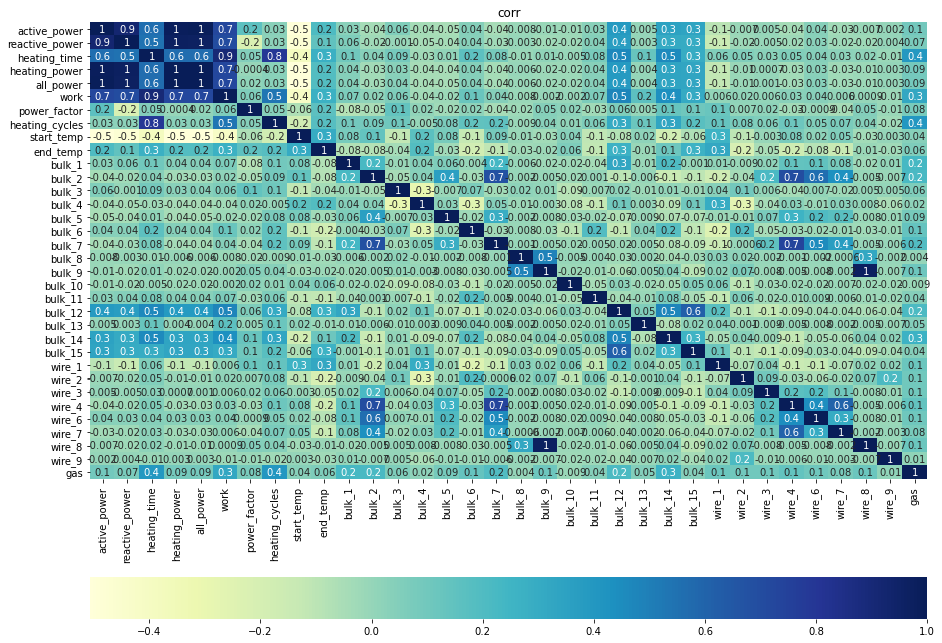

In [177]:
# Построим тепловую карту
plt.figure(figsize=(15, 12))
df_plot = sns.heatmap(df_corr.corr(), cmap="YlGnBu", annot=True, fmt='.1g',
                     cbar_kws= {'orientation': 'horizontal'})
plt.title('corr')
plt.show()

In [178]:
# Выделим область данных, имеющих наивысший уровень корреляции
df_corr_short = df_corr.corr().loc[['active_power', 'reactive_power', 'heating_time', 'heating_power', 'all_power', 'work', 'bulk_9', 'wire_8'],
                                   ['active_power', 'reactive_power', 'heating_time', 'heating_power', 'all_power', 'work', 'bulk_9', 'wire_8']]
df_corr_short

,active_power,reactive_power,heating_time,heating_power,all_power,work,bulk_9,wire_8
active_power,1.000000,0.922950,0.562162,0.985796,0.988395,0.724138,-0.009757,-0.007487
reactive_power,0.922950,1.000000,0.547629,0.974487,0.970468,0.699955,-0.024694,-0.023004
heating_time,0.562162,0.547629,1.000000,0.566735,0.568408,0.900207,0.012877,0.017810
heating_power,0.985796,0.974487,0.566735,1.000000,0.999762,0.727645,-0.016464,-0.014403
all_power,0.988395,0.970468,0.568408,0.999762,1.000000,0.729232,-0.015249,-0.013123
work,0.724138,0.699955,0.900207,0.727645,0.729232,1.000000,-0.001955,0.000938
bulk_9,-0.009757,-0.024694,0.012877,-0.016464,-0.015249,-0.001955,1.000000,0.974968
wire_8,-0.007487,-0.023004,0.017810,-0.014403,-0.013123,0.000938,0.974968,1.000000


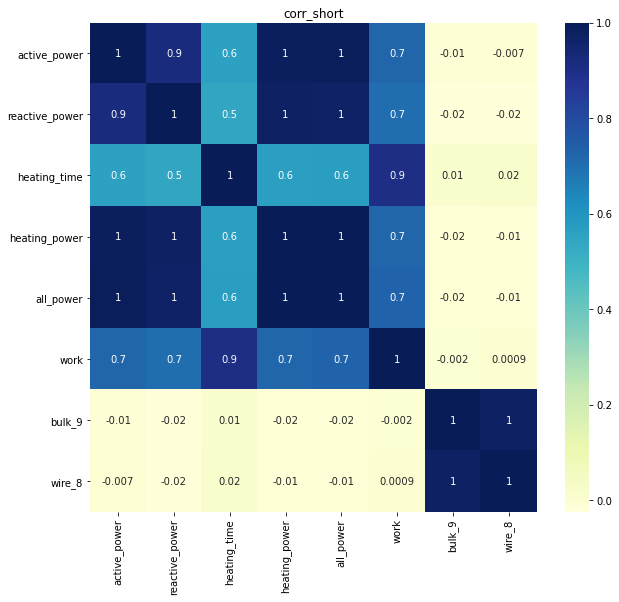

In [179]:
# Построим тепловую карту для данных с наивысшим уровнем корреляции
plt.figure(figsize=(10, 9))
df_plot_short = sns.heatmap(df_corr_short, cmap="YlGnBu", annot=True, fmt='.1g')
plt.title('corr_short')
plt.show()

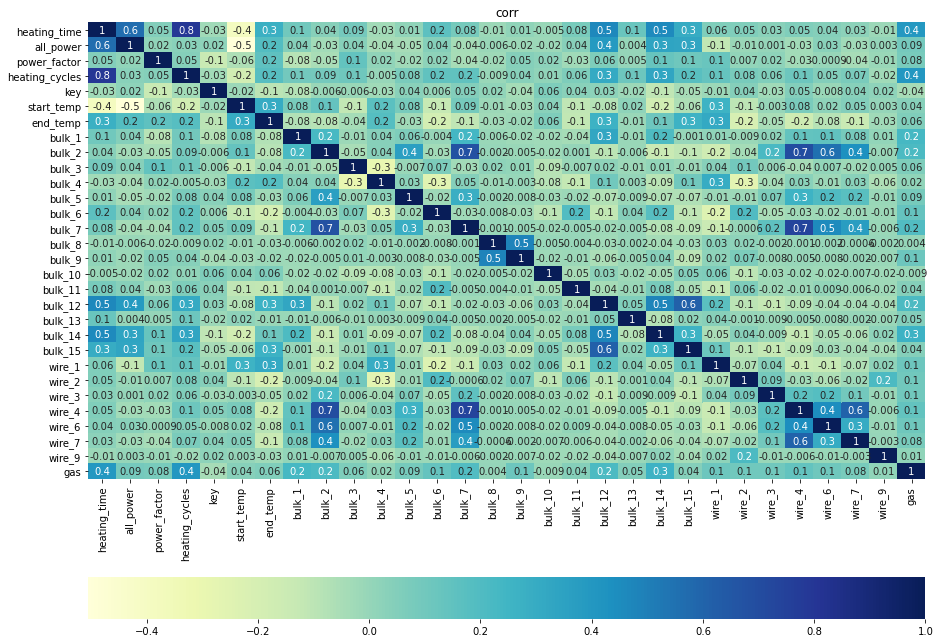

In [180]:
# Удалим излишние параметры и обновим тепловую карту
df_corr = df.drop(['active_power', 'reactive_power', 'heating_power', 'work', 'wire_8'], axis=1)
plt.figure(figsize=(15, 12))
df_plot = sns.heatmap(df_corr.corr(), cmap="YlGnBu", annot=True, fmt='.1g', 
                     cbar_kws= {'orientation': 'horizontal'})
plt.title('corr')
plt.show()

Проверка данных на мультиколлинеарность показала наличие параметров с высоким уровнем пересекающейся корреляции. Снижение уровня мультиколлинеарность было достигнуто удалением следующих параметров:

- `active_power` – активная мощность,
- `reactive_power` – реактивная мощность, 
- `heating_power` – сила нагрева, 
- `work` - работа
- `wire_8` - провлочная добавка 8-го типа

In [181]:
# Извлечем целевой признак в переменную target, а остальные признаки в features
features = df.drop(['key', 
                    'end_temp', 
                    'active_power', 
                    'reactive_power', 
                    'heating_power', 
                    'work',
                    'wire_8'], 
                   axis=1)
target = df['end_temp']

In [182]:
# Выделим 25% данных для тестовой выборки
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=.25,
                                                                            random_state=state)

print(f'features_train - {features_train.shape[0]} строк')
print(f'features_test - {features_test.shape[0]} строк')

features_train - 1743 строк
features_test - 582 строк


In [184]:
# Стандартизируем данные
numeric = ['heating_time', 'all_power', 'power_factor', 'heating_cycles', 'start_temp',
       'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6', 'bulk_7',
       'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12', 'bulk_13',
       'bulk_14', 'bulk_15', 'wire_1', 'wire_2', 'wire_3', 'wire_4',
        'wire_6', 'wire_7', 'wire_9', 'gas']

pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

display(features_train.head())

,heating_time,all_power,power_factor,heating_cycles,start_temp,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,...,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_9,gas
835,0.146891,-0.545328,1.246935,0.192977,0.283909,-0.282144,-0.075801,0.094262,-0.631990,-0.108714,...,1.805350,-1.411149,-0.024328,-0.521297,-0.108904,-0.068489,-0.114387,-0.035756,-0.08862,1.443346
702,-0.827688,-1.429666,0.516420,0.192977,2.191594,-0.282144,-0.075801,-0.630185,0.276166,-0.108714,...,-0.242426,-0.204200,-0.531300,-0.521297,-0.108904,-0.068489,-0.114387,-0.035756,-0.08862,-0.564367
94,0.026897,1.156631,1.000507,-0.428757,2.445952,-0.282144,12.105280,-0.630185,-0.631990,2.938688,...,-1.875772,-1.411149,-2.172011,-0.521297,3.698969,4.453358,7.066705,-0.035756,-0.08862,2.162284
516,0.217130,-0.250637,-0.166837,0.192977,0.326302,-0.282144,-0.075801,-0.630185,3.274793,-0.108714,...,-0.608101,0.990917,0.871464,-0.521297,-0.108904,-0.068489,-0.114387,-0.035756,-0.08862,1.346676
1230,0.255177,1.492940,-0.343791,-0.428757,-1.115060,-0.282144,-0.075801,1.119424,-0.631990,-0.108714,...,0.562057,1.156577,1.030430,-0.521297,-0.108904,-0.068489,-0.114387,-0.035756,-0.08862,-0.650641


**Построим модель машинного обучения:**

- Построим несколько моделей
- Выберем основную по критерию лучшей метрики MAE
- Методом кросс-валидации подберем лучшие гиперпараметры для основной модели
- Проверить модель на вменяемость
- Проверить качество модели на тестовой выборке


In [185]:
# Обучим модель методом линейной регресси
# Проверим методом cross_val_score

model_reg = LinearRegression()
scores = cross_val_score(model_reg, 
                         features_train, 
                         target_train, 
                         cv=3, 
                         scoring='neg_mean_absolute_error')
score_reg = sum(scores) / len(scores)

print(f'На модели логистической регрессии значение MAE {score_reg:.4f}')

На модели логистической регрессии значение MAE -6.1907


Определим значимость признаков для линейной регрессии

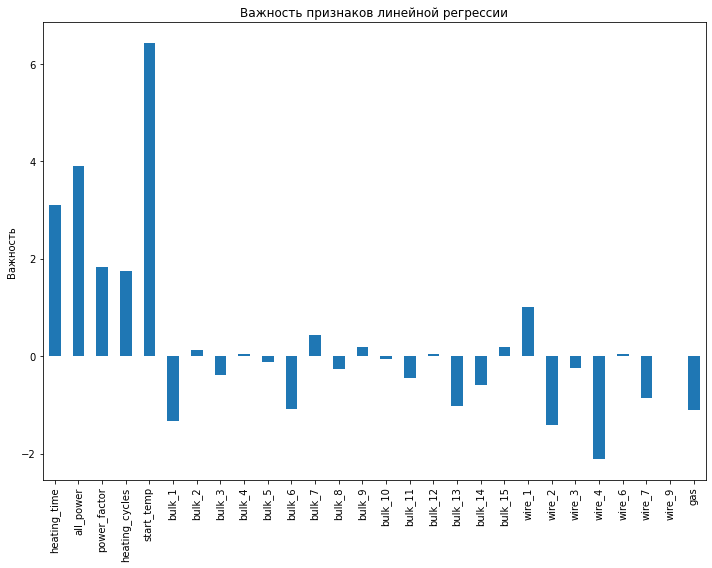

In [186]:
# Обучим модель линейной регрессии
model_reg.fit(features_train, target_train)

# Построим таблицу признаков
coefs_reg = pd.DataFrame({
    'params': features_train.columns,
    'coef_reg': model_reg.coef_
})

# Постриои график признаков
fig, ax = plt.subplots(figsize=(10,8))
coefs_reg.plot.bar(ax=ax)
ax.set_title("Важность признаков линейной регрессии")
ax.set_ylabel('Важность')
ax.set_xticklabels(coefs_reg['params'])
ax.get_legend().remove()
fig.tight_layout()

In [187]:
# Подберем лучшие параметры Решающего дерева методом GridSearchCV
clf = DecisionTreeRegressor(random_state=state)
parametrs = {'max_depth': range(3, 16)}

model_tree_cv = GridSearchCV(clf, parametrs, 
                             cv=3, scoring='neg_mean_absolute_error')
model_tree_cv.fit(features_train, target_train)
best_depth_tree = model_tree_cv.best_params_.get('max_depth')
best_score_tree = model_tree_cv.best_score_
print(f'Лучший параметр глубины - {best_depth_tree}')
print(f'На модели Решающего дерева значение MAE {best_score_tree:.4f}')


Лучший параметр глубины - 5
На модели Решающего дерева значение MAE -7.1577


Определим значимость признаков для Решающего дерева

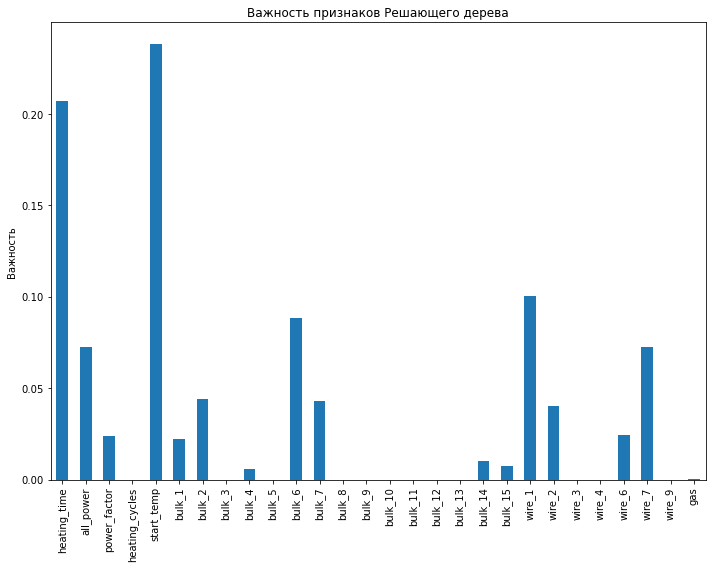

In [188]:
# Обучим модель Решающего дерева
model_tree = DecisionTreeRegressor(max_depth=best_depth_tree, 
                                   random_state=state)
model_tree.fit(features_train, target_train)

# Построим таблицу признаков
coefs_tree = pd.DataFrame({
    'params': features_train.columns,
    'coef_tree': model_tree.feature_importances_
})

# Постриои график признаков
fig, ax = plt.subplots(figsize=(10,8))
coefs_tree.plot.bar(ax=ax)
ax.set_title("Важность признаков Решающего дерева")
ax.set_ylabel('Важность')
ax.set_xticklabels(coefs_tree['params'])
ax.get_legend().remove()
fig.tight_layout()

In [189]:
# Улучшим модель Решающего дерева изменив число деревьев методом GridSearchCV
clf = RandomForestRegressor(max_depth=best_depth_tree, random_state=state)
parametrs = {'n_estimators': range(30, 151, 30)}

model_forest_cv = GridSearchCV(clf, parametrs, 
                               cv=3, scoring='neg_mean_absolute_error')
model_forest_cv.fit(features_train, target_train)
best_depth_forest = model_forest_cv.best_params_.get('n_estimators')
best_score_forest = model_forest_cv.best_score_
print(f'Лучший параметр числа деревьев - {best_depth_forest}')
print(f'На модели случайного леса значение MAE {best_score_forest:.4f}')


Лучший параметр числа деревьев - 120
На модели случайного леса значение MAE -6.5218


Определим значимость признаков для случайного леса

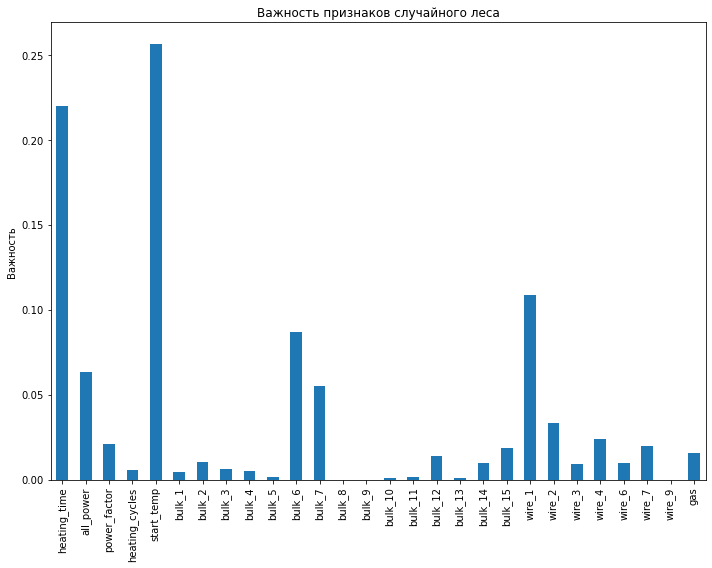

In [190]:
# Обучим модель случайного леса
model_forest = RandomForestRegressor(max_depth=best_depth_tree,
                                     n_estimators=best_depth_forest,
                                     random_state=state)
model_forest.fit(features_train, target_train)

# Построим таблицу признаков
coefs_forest = pd.DataFrame({
    'params': features_train.columns,
    'coef_forest': model_forest.feature_importances_
})

# Постриои график признаков
fig, ax = plt.subplots(figsize=(10,8))
coefs_forest.plot.bar(ax=ax)
ax.set_title("Важность признаков случайного леса")
ax.set_ylabel('Важность')
ax.set_xticklabels(coefs_forest['params'])
ax.get_legend().remove()
fig.tight_layout()

In [191]:
# Проверка "наивным" алгоритмом
model_naive = DummyRegressor()
scores_naive = cross_val_score(model_naive, 
                             features_train, 
                             target_train, 
                             cv=3, 
                             scoring='neg_mean_absolute_error')
best_score_naive = sum(scores_naive) / len(scores_naive)

print(f'На модели наивного алгоритма значение MAE {best_score_naive:.4f}')

На модели наивного алгоритма значение MAE -7.9711


Лучшее значение метрики `MAE` получено на модели **Линейной регрессии**. Примем ее как основную модель. Проверить качество основной модели на тестовой выборке

## Тестирование лучшей модели

In [192]:
# Проверить качество модели на тестовой выборке
model_reg = LinearRegression()
model_reg.fit(features_train, target_train)
answer_test = model_reg.predict(features_test)
score_test = mean_absolute_error(target_test, answer_test)

print(f'На тестовой выборке модели логистической регрессии значение MAE {score_test:.4f}')

На тестовой выборке модели логистической регрессии значение MAE 5.8934


Значение метрики `MAE` получено на тестовой выборке модели **Линейной регрессии** составило `5.8925`

## 3. Составление отчета и описание основных параметров и результатов исследования

1. Описать ход и этапы исследования
2. Указать основные параметры модели и полученные результаты
3. Определить степень готовности модели для передачи ее заказчику
4. Сделать общие выводы по проекту

**Общий обзор**

При реализации проекта были выполнены все пункты поставленного плана. Изменена очередность выполнена некоторых пунктов. В частности, корреляционный анализ был проведен до выделения целевого признака, а не после нормализации данных. Это связано с тем, что при проведении корреляционного анализа возникла проблема мультиколлинеарности, решение которой потребовало удаления ряда признаков. 

Кроме того, методом `кросс-валидации` был произведен не только подбор гипрепараметров, но и определение качества модели по метрике `MAE`. Это потребовало, по сути, объединить два пункта плана. С другой стороны, данное решение позволило делить выборку только на обучающую и тестовую (без валидационной) и повысить качество обучения моделей.

Основной сложностью стала проблема мультиколлинеарности. Именно высокая степень корреляции между некоторыми признаками позволила достичь высокого уровня по метрике MAE. Однако, в наивном алгоритме, данное качество показало переобученность модели. Решением проблемы стало удаление ряда признаков. Выбор перечня удаляемых признаков, также стал проблемой, которая потребовала анализа полноты каждого признака и его важности во всех моделях. В результате были оставлены признаки с наиболее полным содержанием и с наивысшей степенью значимости.

При решении задачи ключевыми шагами стали подбор признаков и параметров модели. Именно оптимальные решения на указанных двух шагах обеспечили достижение требуемого качества модели по метрике `MAE`.

Признаки для обучения итоговой модели:
- `heating_time` – продолжительность нагрева
- `all_power` – общая мощность
- `power_factor` – коэффициент мощности
- `heating_cycles` – количество циклов нагрева
- `start_temp` –начальная температура
- `bulk_1` – объем поданного сыпучего материала №1
- `bulk_2` – объем поданного сыпучего материала №2
- `bulk_3` – объем поданного сыпучего материала №3
- `bulk_4` – объем поданного сыпучего материала №4
- `bulk_5` – объем поданного сыпучего материала №5
- `bulk_6` – объем поданного сыпучего материала №6
- `bulk_7` – объем поданного сыпучего материала №7
- `bulk_8` – объем поданного сыпучего материала №8
- `bulk_9` – объем поданного сыпучего материала №9
- `bulk_10` – объем поданного сыпучего материала №10
- `bulk_11` – объем поданного сыпучего материала №11
- `bulk_12` – объем поданного сыпучего материала №12
- `bulk_13` – объем поданного сыпучего материала №13
- `bulk_14` – объем поданного сыпучего материала №14
- `bulk_15` – объем поданного сыпучего материала №15
- `wire_1` – объем поданного проволочного материала №1
- `wire_2` – объем поданного проволочного материала №2
- `wire_3` – объем поданного проволочного материала №3
- `wire_4` – объем поданного проволочного материала №4
- `wire_6` – объем поданного проволочного материала №6
- `wire_7` – объем поданного проволочного материала №7
- `wire_9` – объем поданного проволочного материала №9
- `gas` – объем поданного газа для продувки

**Итоговая модель** – `Линейная регрессия`. Значение `MAE` на тестовой достигает `5.8934`


**Ход и этапы исследования**

В ходе исследования была проведена анализ и предобработка данных, исследование качества различных моделей методом кросс-валидации, и проверка качества лучшей модели на тестовой выборке.

От заказчика получено семь файлов, пять из которых признаны годными для дальнейшей работы. Надо отметить, что в разных файлах использовано не синхронизированное время. Корректная синхронизация имеет место только в рамках каждого отдельного дата-фрейма.

По результатам анализа данных выявлено, что полученные данные имею аномалии, пропуски и некорректные типы данных. Нет ни одного файла, где бы присутствуют все имеющиеся замеры (ключи), максимальное количество кторых составляет 3241. Минимальная нехватка составляет 2 ключа, максимальная нехватка – 180 ключей. Кроме того, анализ показал, что столбцы файлов, содержащие даты, имеют тип object. 

В процессе анализа данных были получены ответы на поставленные ранее вопросы:
1.	В чем разница между активной и реактивной мощностью?
    -	Активная мощность - это истинная мощность, которая выполняет полезную работу в цепи. Реактивная мощность - это доля мощности, которая не выполняет никакой полезной работы, а лишь течет между источником и нагрузкой в цепи.
2.	Почему замер температуры происходит не сразу после первого / второго нагрева плавки?
    - Результат отсутствия синхронизации замеров между разными файлами (вероятно, вследствие не синхронно выставленным временем на различных датчиках и измерительных приборах)
3.	Почему нет замера температуры перед подачей проволоки?
    - Результат отсутствия синхронизации замеров между разными файлами (вероятно, вследствие не синхронно выставленным временем на различных датчиках и измерительных приборах)
4.	Какая температура является целевым показателем: последняя, средняя или максимальная?
    - Целевым параметром является последний замер температуры
5.	Какая целевая метрика?
    - Температура последнего замера

В рамках предобработки были устранены аномалии, данные столбцов, содержащих даты приведены к типу data. Кроме того, были удалены пропуски (заменены на 0), удалены ключи с отсутствующими данными. Для файла нагрева были добавлены новые показатели:
- Длительность нагрева
- Сила нагрева
- Общая мощность
- Работа
- Коэффициент мощности
- Количество циклов нагрева

Поскольку имеет место различная степень присутствия ключей в разных файлах, то итоговое объединение файлов проведено по внутреннему соединению (метод inner)

Проведенный корреляционный анализ показал, что у целевого показателя есть невыраженная корреляционная связь со значениями:
- первой проволочной добавки (`wire_1`),
- начальной температуры (`start_temp`),
- временем нагрева (`heating_time`),
- работой (`work`),
- двенадцатой и пятнадцатой кусковыми добавками (`bulk_12`, `bulk_15`),
- активной мощностью (`active_power`)
- второй проволочной добавкой (`wire_2`) - обратная зависимость

При этом в данных имеет место мультиколлинеарность. Проверка данных на показала наличие параметров с высоким уровнем пересекающейся корреляции. Снижение уровня мультиколлинеарность было достигнуто удалением следующих параметров:
- `active_power` – активная мощность,
- `reactive_power` – реактивная мощность,
- `heating_power` – сила нагрева,
- `work` - работа
- `wire_8` - провлочная добавка 8-го типа

В рамках подготовки данных была выделена тестовая выборка `25%` а все данные были стандартизированы методом `StandardScaler`

В качестве моделей машинного обучения использованы `Линейная регрессия`, `Решающее дерево` и `Случайный лес`. При проверке качества на всех моделях использована `кросс-валидация`. По каждой модели определена значимость используемых признаков

По результату анализа лучшей моделью признана `Линейная регрессия`, которая на тестовой выборке показала `MAE` (средне-абсолютное отклонение) `5.8934`


**Основные параметры модели и полученные результаты**

При выборе модели машинного обучения с использованием метода `кросс-валидации` получены следующие результаты:
1. **Линейная регрессия**.  Значение `MAE` `6.1907`. Наиболее значимые параметры – начальная температура, общая мощность и время нагрева.
2. **Решающее дерево**. Лучший параметр глубины – `5`.  Значение `MAE` `7.1577`. Наиболее значимые параметры – начальная температура и время нагрева.
3. **Случайный лес** (с параметром глубины 5). Лучший параметр числа деревьев – `120`.  Значение `MAE` `6.5218`. Наиболее значимые параметры – начальная температура и время нагрева.

Тестовая выборка составляет `25%` от общей выборки. `Линейная регрессия` на тестовой выборке показала значение `MAE` `5.8934`


**Степень готовности модели для передачи ее заказчику**

Модель достигал целевого показателя, проверена на вменяемость наивным алгоритмом и готова быть передана заказчику в промышленную эксплуатацию.

Высокий уровень качества построенной модели, также подтверждается ее проверкой на тестовой выборке с достижение заданных заказчиком целевых показателей точности. 


**Общее резюме**

Проект обеспечил достижение ожидаемого результата - **построена модель машинного обучения для прогнозирования температуры выплавляемой стали с размером показателя `MAE` не более `6,8` (достигнуто значение `MAE` `5.8934`)**.

В тоже время, достижение целей заказчика, а именно обеспечение сокращения потребления электроэнергии за счет оптимизации процесса нагрева стали, не представляется очевидным.

Проект не дает четкого представлены о том какие факторы могут влиять на сокращение потребления электроэнергии. В рамках дальнейших исследований имеет смысл сосредоточить внимание на том факте, что во всех используемых моделях важнейшими параметрами прогноза стали начальная температура и время нагрева. Представляется, что, оказывая влияние на эти параметры (особенно, на начальную температуру), можно достигать значимых результатов по сокращению потребления электроэнергии.
